<a href="https://colab.research.google.com/github/thedarsideofit/finance_python_practices/blob/main/prophet_ticker_forecasting_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Source

https://towardsdatascience.com/apple-stock-and-bitcoin-price-predictions-using-fbs-prophet-for-beginners-python-96d5ec404b77?gi=962fdc51375b

### Changepoint Detection
https://facebook.github.io/prophet/docs/trend_changepoints.html#automatic-changepoint-detection-in-prophet

### Plotly In Colab
https://colab.research.google.com/github/binnisb/blog/blob/master/_notebooks/2020-04-02-Plotly-in-lab.ipynb#scrollTo=fblKrSaCeCz3

### Hyper Parameter tunning and metrics
https://futurice.com/blog/business-forecasting-with-facebook-prophet


In [1]:
pip install alphavantage_api

     |████████████████████████████████| 194kB 6.4MB/s 
  Created wheel for alphavantage-api: filename=alphaVantage_api-1.0.19-cp36-none-any.whl size=31078 sha256=2754305a2bb83de774a0cc0d0fa0cdaa6d06be3d8586a46a06e72d060cd1dc44
  Stored in directory: /root/.cache/pip/wheels/29/c9/58/65a232b76acc71aa17f73d849fe9ec8a854b3e44b5c57e2322
Successfully built alphavantage-api


In [3]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 7.2MB/s 
     |████████████████████████████████| 296kB 17.4MB/s 
     |████████████████████████████████| 143kB 20.3MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=a26ec8e67259b6d152ce9a12274c5fed8d9da2ce8e2c20910b9bd0678444593f
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=b2673e086f9404587935aed2bbbf58b0709f8f03b8d777eae3c2e2b1d44a2449
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [5]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wordcloud
from alphaVantageAPI.alphavantage import AlphaVantage 

In [30]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
######### CHANGE THE TICKER HERE #########
ticker = 'PG'
######### CHANGE THE TICKER HERE #########
ts = TimeSeries(key='Your Access Key',output_format='pandas')
stock, meta_data = ts.get_daily(symbol=ticker,outputsize='full')
stock.head()

1. open  2. high    3. low  4. close  5. volume
date                                                       
2020-11-27   138.59   138.89  137.5300    138.61  4252166.0
2020-11-25   138.16   139.39  138.0400    138.68  8411414.0
2020-11-24   138.83   139.84  138.0700    138.31  7085825.0
2020-11-23   139.32   139.95  137.8627    138.76  4771187.0
2020-11-20   139.53   140.35  138.6300    139.30  4727377.0

In [31]:
#Write/Read from a file.
stock.to_csv ('/content/drive/My Drive/Colab Notebooks/Finanzas/' + ticker + 'pricedata.csv', index = 'date', header=True)
stock = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Finanzas/' + ticker + 'pricedata.csv')
stock.head()

date  1. open  2. high    3. low  4. close  5. volume
0  2020-11-27   138.59   138.89  137.5300    138.61  4252166.0
1  2020-11-25   138.16   139.39  138.0400    138.68  8411414.0
2  2020-11-24   138.83   139.84  138.0700    138.31  7085825.0
3  2020-11-23   139.32   139.95  137.8627    138.76  4771187.0
4  2020-11-20   139.53   140.35  138.6300    139.30  4727377.0

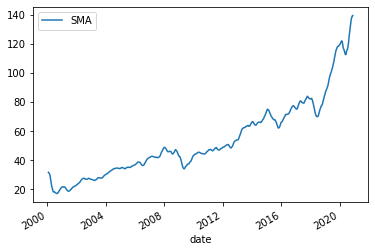

In [32]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
ti = TechIndicators(key='NLRHFAQBGU5WGPQH',output_format='pandas')
data, meta_data = ti.get_sma(symbol=ticker,interval='daily', time_period=60,series_type = 'close')
data.plot()
plt.show()

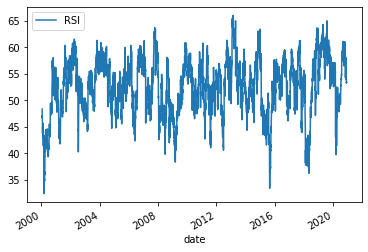

In [33]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
ti = TechIndicators(key='Youraccesskey',output_format='pandas')
data, meta_data = ti.get_rsi(symbol=ticker,interval='daily', time_period=60,series_type = 'close')
data.plot()
plt.show()

In [34]:
#Convert the dataframe into the prophet expected format.
stock.rename(columns={'4. close': 'y', 'date': 'ds'},inplace=True)
stock['ds'] = pd.to_datetime(stock['ds'])
# To avoid the peaks we're gonna use the log
stock['y']= np.log(stock['y']).astype(float)
stock.head()

ds  1. open  2. high    3. low         y  5. volume
0 2020-11-27   138.59   138.89  137.5300  4.931664  4252166.0
1 2020-11-25   138.16   139.39  138.0400  4.932169  8411414.0
2 2020-11-24   138.83   139.84  138.0700  4.929498  7085825.0
3 2020-11-23   139.32   139.95  137.8627  4.932746  4771187.0
4 2020-11-20   139.53   140.35  138.6300  4.936630  4727377.0

In [35]:
#Fit the model 
df_prophet = Prophet(changepoint_prior_scale=0.01, daily_seasonality=True)
df_prophet.fit(stock)

In [36]:
fcast_time= 365   # 1 year
df_forecast = df_prophet.make_future_dataframe(periods= fcast_time, freq='D')
df_forecast.tail(10)

ds
5659 2021-11-18
5660 2021-11-19
5661 2021-11-20
5662 2021-11-21
5663 2021-11-22
5664 2021-11-23
5665 2021-11-24
5666 2021-11-25
5667 2021-11-26
5668 2021-11-27

In [37]:
# Forecasting - call the method predict
df_forecast = df_prophet.predict(df_forecast)
df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper'] ]
df = df_forecast[df_forecast['ds']< '2020-12-31']
# Convert the value to see the price
df['yhat'] = np.exp(df['yhat'])
df['yhat_lower'] = np.exp(df['yhat_lower'])
df['yhat_upper'] = np.exp(df['yhat_upper'])
df[['ds','yhat', 'yhat_lower', 'yhat_upper'] ].to_csv ('/content/drive/My Drive/Colab Notebooks/Finanzas/' + ticker + 'pricedata-predicted.csv', index = 'ds', header=True)
df[['ds','yhat', 'yhat_lower', 'yhat_upper'] ].tail(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

ds        yhat  yhat_lower  yhat_upper
5317 2020-12-11  130.942877  115.974569  146.002187
5318 2020-12-12  133.757289  118.530578  149.784088
5319 2020-12-13  133.871211  119.714573  149.038390
5320 2020-12-14  131.298656  117.421098  146.461746
5321 2020-12-15  131.477746  118.158256  147.725285
5322 2020-12-16  131.599321  117.161485  146.910235
5323 2020-12-17  131.571036  117.862468  147.015851
5324 2020-12-18  131.638988  116.551493  146.847103
5325 2020-12-19  134.424574  119.813135  151.303918
5326 2020-12-20  134.493778  120.153356  148.921613
5327 2020-12-21  131.864386  118.674055  146.880795
5328 2020-12-22  131.999745  118.168479  149.249192
5329 2020-12-23  132.078470  118.355061  148.285109
5330 2020-12-24  132.008605  117.535321  148.683853
5331 2020-12-25  132.037611  117.608747  149.230816
5332 2020-12-26  134.794319  119.959731  150.600250
5333 2020-12-27  134.829204  120.478600  151.822026
5334 2020-12-28  132.162141  117.583644  149.159891
5335 2020-12-29  132.269175  118.618847  148.864207
5336 2020-12-30  132.321564  118.410112  148.958282

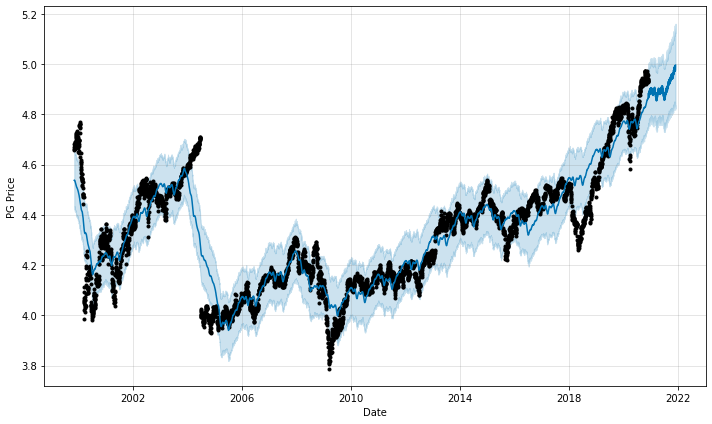

In [38]:
fig = df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = ticker + ' Price')
fig.show()

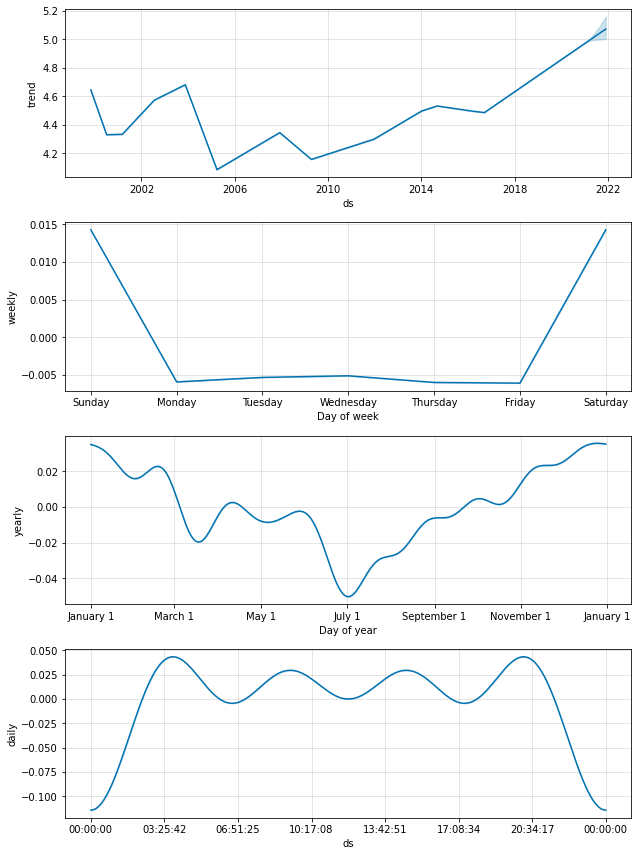

In [39]:
fig2 = df_prophet.plot_components(df_forecast)
plt.show()

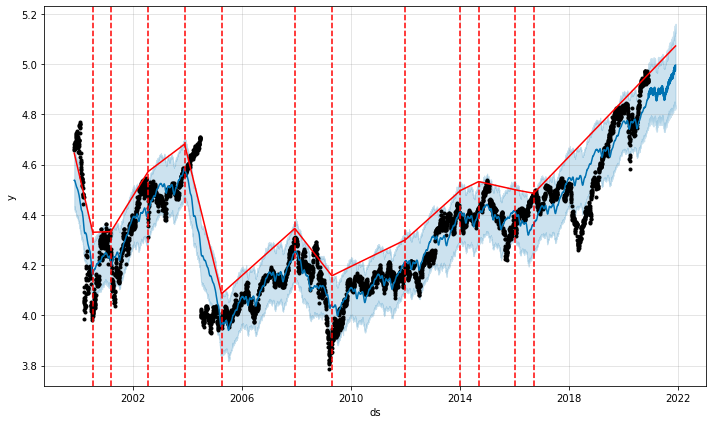

In [40]:
from fbprophet.plot import add_changepoints_to_plot

fig = df_prophet.plot(df_forecast)
a = add_changepoints_to_plot(fig.gca(), df_prophet, df_forecast)


In [41]:
from fbprophet.plot import plot_plotly
from IPython.display import HTML
fig = plot_plotly(df_prophet, df_forecast)  # This returns a plotly Figure
HTML(fig.to_html())

In [42]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(df_prophet, initial='730 days', period='180 days', horizon = '30 days')
df_cv.tail()

INFO:fbprophet:Making 39 forecasts with cutoffs between 2002-02-05 00:00:00 and 2020-10-28 00:00:00


ds      yhat  yhat_lower  yhat_upper         y     cutoff
793 2020-11-20  4.846525    4.724414    4.962541  4.936630 2020-10-28
794 2020-11-23  4.848751    4.731126    4.965367  4.932746 2020-10-28
795 2020-11-24  4.849953    4.739763    4.968122  4.929498 2020-10-28
796 2020-11-25  4.850908    4.735119    4.970869  4.932169 2020-10-28
797 2020-11-27  4.851488    4.742533    4.966029  4.931664 2020-10-28

In [25]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0  3 days  0.019372  0.139182  0.091807  0.024159  0.015226  0.673807
1  4 days  0.021671  0.147210  0.100569  0.026447  0.017241  0.599318
2  5 days  0.023309  0.152674  0.108484  0.028494  0.018629  0.574593
3  6 days  0.020275  0.142392  0.102638  0.026886  0.018087  0.569620
4  7 days  0.015286  0.123638  0.089833  0.023501  0.016451  0.612950

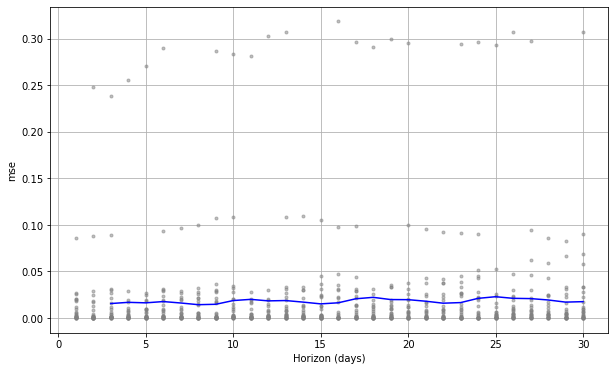

In [43]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mse')